In [5]:
import os #To explore different folders.
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #openCV alosn can be used but we shall imread to read the images
from skimage.transform import resize #To resize the images for better model buidling

Images are in matrix form, they need to flatten out for the model building.

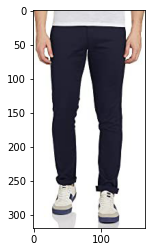

In [6]:
target = []
images = []
flat_data = []

datadir = '/content/scraped_data' #path of the scraped images folder from the colab. (The scraped pictures were uploaded to colab, from there the data was pulled.)
categories = ['jeans', 'sarees', 'trousers']

for i in categories:
  class_num = categories.index(i) #It will label encode the categories of image folders
  path = os.path.join(datadir,i) #path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    plt.imshow(img_array) #The sample image
    break

#### Data is being flattened.

In [7]:
for i in categories:
  class_num = categories.index(i) #It will label encode the categories of image folders
  path = os.path.join(datadir,i) #path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img)) #every image will be read.

    img_resized = resize(img_array, (150, 150, 3)) #Each image will be resized to common size (It normalizes to 0 and 1)
    
    flat_data.append(img_resized.flatten()) #Images will be flattened for image classification post convolution
    
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [8]:
flat_data[0] #pixel points of 1st image

array([0.98030065, 0.93912418, 0.90814379, ..., 0.97621351, 0.98988235,
       0.98614815])

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
#Let's see the unique return of images count of each category.
#0, 1 and 2 are jeans, sarees and trousers

np.unique(target,return_counts = True)

(array([0, 1, 2]), array([246, 246, 246]))

<BarContainer object of 3 artists>

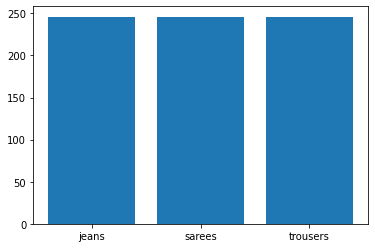

In [11]:
category, count = np.unique(target,return_counts = True)

plt.bar(categories, count)

Clearly, the plot shows the images distribution from each category.

## Model Building

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 109)

### SVC

The hyperparameters which can be tuned in order to get the best possible score are being used below.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001] ,'kernel':['rbf']} #Kernel with an appropriate C value will be taken by the model to give the best score
]

svc = svm.SVC(probability = True) #This will show the other probabilty along with the main one as well.
clf = GridSearchCV(svc, param_grid) #param_grid will let the default values 
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score

In [37]:
y_pred = clf.predict(x_test)

accuracy_score(y_pred, y_test)

0.9234234234234234

92.3% of the prediction is correct.

In [38]:
confusion_matrix(y_pred, y_test)

array([[66,  0, 16],
       [ 0, 81,  1],
       [ 0,  0, 58]])

66, 81 and 58 are the correct prediction of the pictures by the model

### Multinomial Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
predictions = MNB.predict(x_test)

In [18]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        66
           1       0.97      0.96      0.97        81
           2       0.80      0.64      0.71        75

    accuracy                           0.82       222
   macro avg       0.82      0.81      0.81       222
weighted avg       0.83      0.82      0.81       222

[[55  2  9]
 [ 0 78  3]
 [27  0 48]]
Accuracy :  81.53  %
f1_score :  0.815


### XGBoost

In [19]:
# xgboost
import warnings
warnings.filterwarnings("ignore")

import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)

y_pred_test = xgb.predict(x_test)

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

print('\n')

print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

print('\n')

print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

[[56  0 10]
 [ 0 81  0]
 [ 6  0 69]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        66
           1       1.00      1.00      1.00        81
           2       0.87      0.92      0.90        75

    accuracy                           0.93       222
   macro avg       0.93      0.92      0.92       222
weighted avg       0.93      0.93      0.93       222



Training accuracy is 1.0


Test accuracy is 0.9279279279279279


### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators":[10,100,500]}

rfc=RandomForestClassifier()

clf = GridSearchCV(rfc, parameters, cv=10)
clf.fit(x_train,y_train)
clf.best_params_

{'n_estimators': 500}

In [27]:
rfc = RandomForestClassifier(n_estimators=500)

rfc.fit(x_train,y_train)
rfc_predict=rfc.predict(x_test)

In [28]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        66
           1       1.00      1.00      1.00        81
           2       0.89      0.91      0.90        75

    accuracy                           0.93       222
   macro avg       0.93      0.93      0.93       222
weighted avg       0.93      0.93      0.93       222



In [29]:
print("Model Acc:",rfc.score(x_test,y_test))

Model Acc: 0.9324324324324325


Among all the models, RFC seems to be predicting well.

## Final model Testing

#### Let's save RFC model first, it yielded better score

In [20]:
#saving the model using pickle

import pickle
pickle.dump(rfc, open('img_model.p', 'wb'))

In [23]:
model = pickle.load(open('img_model.p', 'rb'))

enter the picture url herehttps://m.media-amazon.com/images/I/91d17vEsP9L._UY445_.jpg
(445, 318, 3)
Predicted Output: sarees


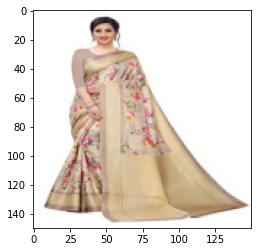

In [24]:
#Testing the model with a brand new image

flat_data = []

url = input('enter the picture url here')

img = imread(url)
img_resized = resize(img, (150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)

y_out = model.predict(flat_data)
y_out = categories[y_out[0]]

print(f'Predicted Output: {y_out}')

The model predicted the picture correctly. Thus, the present model can be used to train with more images further if needed to predict the right images as output if at all deployed in the market usage.